# Basics usage

In [1]:
import sys
import importlib

sys.path.append("../")

import flowgsp
from flowgsp.utils import *
from flowgsp.graphs.basic_graphs import create_cycle_graph

from flowgsp.utils import sobolev

import scienceplots
plt.style.use(['science','ieee', 'no-latex'])

# for better visualisation of graphs. Comment out if not needed
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = [3, 2]

# import warnings
# # Suppress FutureWarning messages
# warnings.simplefilter(action='ignore', category=FutureWarning)

## Description

Basics of instantion and plotting and spectrum visualization

GOAL: Get familiar with `flowgsp`

Instantiating main class + workflow and plotting

<Current Operator(name=laplacian, num_nodes=20, num_edges=20)>


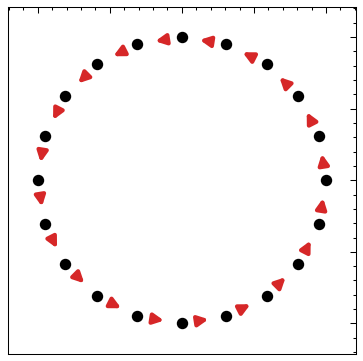

In [2]:
G, pos = create_cycle_graph(20, 1) 
# G, pos = create_cycle_graph(20, 2) # Uncomment for bicycle graph
# G, pos = create_torus_laminar_flow_graph(11, 3) # Uncomment for torus graph with laminar flow

graph = flowgsp.graphs.Graph(G=G, pos=pos)
graph.set_operator('laplacian')

fig, ax = plt.subplots(1, figsize=(3, 3))
graph.draw(ax=ax, node_size=20, node_color='k', arrow_size=10, arrow_width=2)
# graph.draw(ax=ax, node_size=10) # For laminar flow graph, node_size=10 is recommended

print(graph)

Accessing the basis + Visualizing frequencies and eigenvectors

/Users/mikichan/miniconda3/envs/dGSP/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


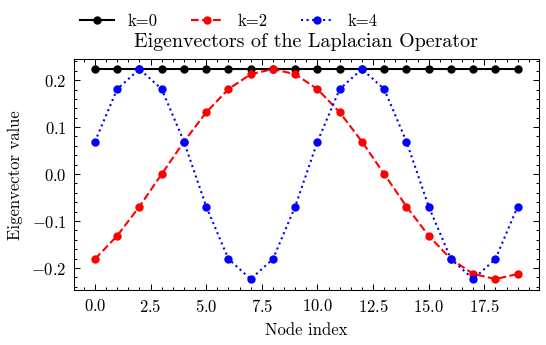

In [3]:
fig, ax = plt.subplots(1, figsize=(4, 2))

for k in range(0, 6, 2):
    ax.plot(graph.operator.U[:, k], label=f'k={k}', marker='o', markersize=3)

ax.set_xlabel('Node index')
ax.set_ylabel('Eigenvector value')
ax.set_title('Eigenvectors of the Laplacian Operator')
ax.legend(loc=(0,1.1), ncol=3)

Text(0.5, 1.0, 'Eigenvalues of the Laplacian Operator')

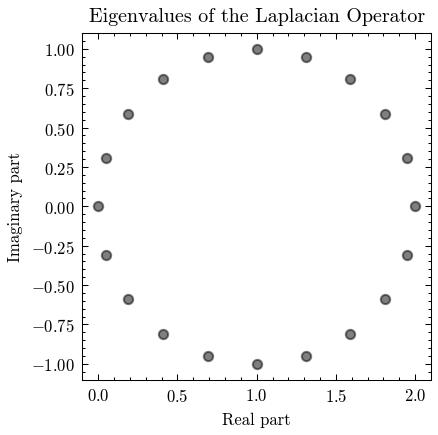

In [4]:
fig, ax = plt.subplots(1, figsize=(3, 3))
ax.scatter(graph.operator.V.real, graph.operator.V.imag, s=20, c='black', alpha=0.5)
ax.set_xlabel('Real part')
ax.set_ylabel('Imaginary part')
ax.set_title('Eigenvalues of the Laplacian Operator')

Text(0, 0.5, 'Frequency value')

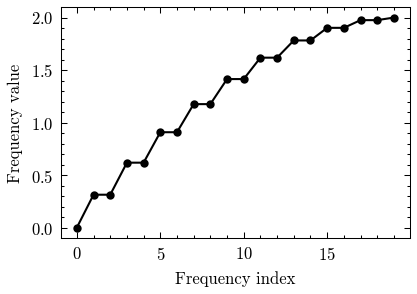

In [5]:
plt.plot(graph.operator.frequencies, marker='o', markersize=3)
plt.xlabel('Frequency index')
plt.ylabel('Frequency value')

Instantiating Filters

In [6]:
spectral_filter = flowgsp.filters.SpectralFilter(graph)
polynomial_filter = flowgsp.filters.PolynomialFilter(graph, order=15)
kernel = (graph.operator.frequencies < 1).astype(float) # Low-pass filter

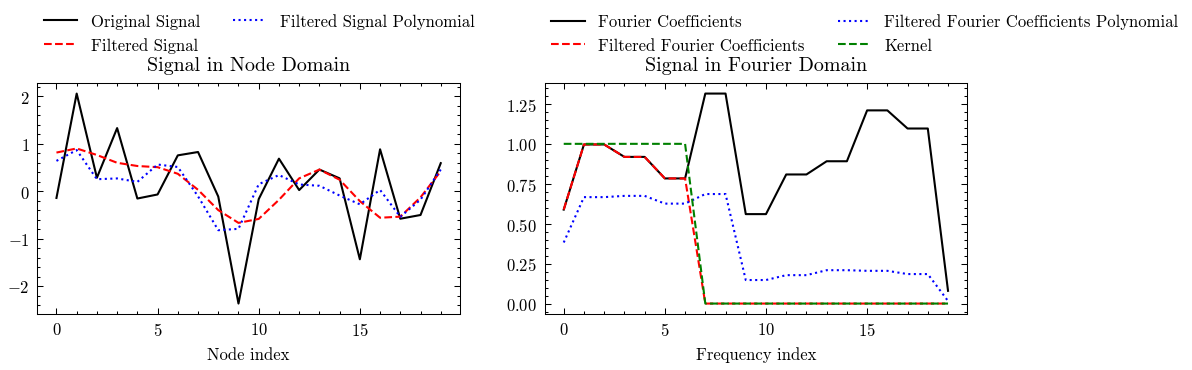

In [7]:
np.random.seed(99)  # For reproducibility
random_signal = np.random.randn(graph.N)
fourier_coefs = graph.operator.GFT(random_signal)

filtered_signal = spectral_filter.apply(random_signal, kernel=kernel)
filtered_signal_pol, pol_coefs = polynomial_filter.apply(random_signal, 
                                                         kernel, 
                                                         return_coefs=True, 
                                                         rcond=1e-5)
fourier_coefs_filtered = graph.operator.GFT(filtered_signal)
fourier_coefs_pol_filtered = graph.operator.GFT(filtered_signal_pol)

fig, ax = plt.subplots(1, 2, figsize=(8, 2))

ax[0].plot(random_signal, label='Original Signal')
ax[0].plot(filtered_signal, label='Filtered Signal')
ax[0].plot(filtered_signal_pol, label='Filtered Signal Polynomial')
ax[0].set_xlabel('Node index')

ax[1].plot(np.abs(fourier_coefs), label='Fourier Coefficients')
ax[1].plot(np.abs(fourier_coefs_filtered), label='Filtered Fourier Coefficients')
ax[1].plot(np.abs(fourier_coefs_pol_filtered), label='Filtered Fourier Coefficients Polynomial')
ax[1].plot(kernel, label='Kernel', linestyle='--')
ax[1].set_xlabel('Frequency index')
ax[0].set_title('Signal in Node Domain')
ax[1].set_title('Signal in Fourier Domain')
ax[0].legend(loc=(0,1.1), ncols=2)
ax[1].legend(loc=(0,1.1), ncols=2)

Text(0, 0.5, 'Coefficient value')

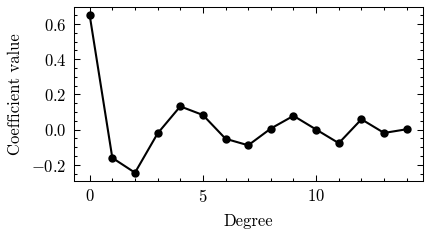

In [8]:
fig, ax = plt.subplots(1, figsize=(3, 1.5))
ax.plot(pol_coefs, marker='o', markersize=3)
ax.set_xlabel('Degree')
ax.set_ylabel('Coefficient value')

In [9]:
smoothness_random = sobolev(random_signal, graph.operator.M)
smoothness_filtered = sobolev(filtered_signal, graph.operator.M)
smoothness_filtered_pol = sobolev(filtered_signal_pol, graph.operator.M)

print(f'Smoothness of random signal: {smoothness_random:.4f}')
print(f'Smoothness of filtered signal: {smoothness_filtered:.4f}')
print(f'Smoothness of filtered signal (polynomial): {smoothness_filtered_pol:.4f}')

Smoothness of random signal: 6.0274
Smoothness of filtered signal: 1.3603
Smoothness of filtered signal (polynomial): 1.8655


For others more involved methods and usage check the `advanced.ipynb` notebook or contact me @Michael <miki998chan@gmail.com>